# <font color='blue'>Projet 07 Data Science</font>
## Implémentez un modèle de scoring
## <font color='blue'>Partie 2 : Modèle </font>

### <font color='green'>Auteur & Copyright : Julien Maisonnier (Fevrier 2022)</font>

# Introduction

La société <b>Prêt à dépenser</b> propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite <b>mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité</b> qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un <b>algorithme de classification</b> en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de <b>transparence</b> vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

<b>Prêt à dépenser décide donc de développer un dashboard interactif</b> pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.

## Mission

<ol>
    <li>Construire un <b>modèle de scoring</b> qui donnera une <b>prédiction sur la probabilité de faillite d'un client de façon automatique</b>.</li>
<li>Construire un <b>dashboard interactif</b> à destination des gestionnaires de la relation client permettant <b>d'interpréter les prédictions faites par le modèle</b>, et d’améliorer la connaissance client des chargés de relation client.</li>
</ol>

<b>Recommendation</b>

Sélectionner un kernel Kaggle pour vous faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring et analyserez ce kernel et l’adapterez pour s'assurer qu’il répond aux besoins de la mission.

Se focaliser sur l’élaboration du modèle, son optimisation et sa compréhension.

## Spécifications minimum du dashboard
- Permettre de <b>visualiser le score et l’interprétation de ce score pour chaque client</b> de façon intelligible pour une personne non experte en data science.
- Permettre de <b>visualiser des informations descriptives relatives à un client</b> (via un système de filtre).
- Permettre de <b>comparer les informations descriptives relatives à un client à l’ensemble des clients</b> ou à un groupe de clients similaires.

# A - Librairies Python

In [141]:
%matplotlib inline  

import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import pickle

import matplotlib.pyplot as plt

from matplotlib.image import imread

# from datetime import datetime

# from sklearn.preprocessing import StandardScaler

# from sklearn.cluster import KMeans

# from matplotlib.image import imread

# from sklearn.preprocessing import StandardScaler

# from sklearn.metrics import classification_report, confusion_matrix, adjusted_rand_score

# from matplotlib.ticker import PercentFormatter

# -      

# from math import pi

# from datetime import datetime

# from dateutil.relativedelta import relativedelta

# from sklearn.preprocessing import StandardScaler

# from sklearn import preprocessing

# from sklearn import dummy

# from sklearn.cluster import KMeans

# from sklearn.cluster import DBSCAN

# from sklearn import manifold

# from sklearn import datasets

# from sklearn import decomposition

# from sklearn import ensemble

# from sklearn import discriminant_analysis

# from sklearn import random_projection

# from matplotlib import offsetbox

# from mpl_toolkits.mplot3d import Axes3D


# --------------------------------

# from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer

# from sklearn.preprocessing import RobustScaler, OneHotEncoder

# from sklearn import preprocessing

# from sklearn import linear_model

# from sklearn.linear_model import LinearRegression

# from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.linear_model import Ridge, Lasso

# from sklearn.svm import LinearSVR

# from sklearn import metrics

# from sklearn.model_selection import KFold

# from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

# from sklearn import dummy

# from sklearn.model_selection import GridSearchCV

# ------------------------

# from sklearn.ensemble import GradientBoostingClassifier

# -------------------------------
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler, OneHotEncoder

from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, adjusted_rand_score

#### Disable auto-scrolling so that graphs display properly

In [142]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### PEP 8  check

In [143]:
# %load_ext pycodestyle_magic

In [144]:
# %flake8_on

## Les données

https://www.kaggle.com/c/home-credit-default-risk/data



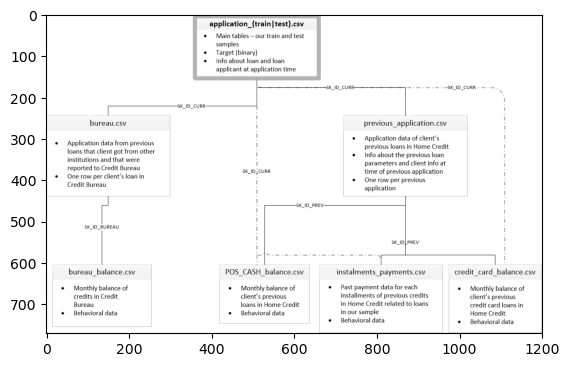

In [145]:
file_name_data = '_home_credit.png'
image_data = imread('./data/' + file_name_data)
# fig, ax = subplots(figsize=(18, 2))
# plt.imshow(image_data, origin = 'lower', aspect='1000',  extent = [0, 1000, 0, 1])
plt.imshow(image_data)

# B - Methodes

In [146]:
def ft_cut_off(cut_off, y_pred_lgb_proba):
    y_pred_final_lgb = []
    for my_pred in y_pred_lgb_proba:
        if my_pred > cut_off:
            y_pred_final_lgb.append(1)
        else:
            y_pred_final_lgb.append(0)
    y_pred_final_lgb[:10]
#     print(classification_report(y_test, y_pred_final_lgb))
    
    precision,recall,fscore,support=score(y_test, y_pred_final_lgb)
#     print(round(recall[1],3))
    return round(recall[1],3)

In [147]:
def return_prediction(model,sample_json, cut_off):


    EXT_SOURCE_3 = sample_json['EXT_SOURCE_3']
    EXT_SOURCE_1 = sample_json['EXT_SOURCE_1']
    EXT_SOURCE_2 = sample_json['EXT_SOURCE_2']
    AMT_ANNUITY = sample_json['AMT_ANNUITY']
    
    DAYS_BIRTH = sample_json['DAYS_BIRTH']
    AMT_CREDIT = sample_json['AMT_CREDIT']
    DAYS_LAST_PHONE_CHANGE = sample_json['DAYS_LAST_PHONE_CHANGE']
    AMT_GOODS_PRICE = sample_json['AMT_GOODS_PRICE']
    
    DAYS_ID_PUBLISH = sample_json['DAYS_ID_PUBLISH']
    DAYS_EMPLOYED = sample_json['DAYS_EMPLOYED']
    AMT_INCOME_TOTAL = sample_json['AMT_INCOME_TOTAL']
    OWN_CAR_AGE = sample_json['OWN_CAR_AGE']
    
    credit_info = [[EXT_SOURCE_3, EXT_SOURCE_1, EXT_SOURCE_2, AMT_ANNUITY,
                    DAYS_BIRTH, AMT_CREDIT, DAYS_LAST_PHONE_CHANGE, AMT_GOODS_PRICE,
                    DAYS_ID_PUBLISH, DAYS_EMPLOYED, AMT_INCOME_TOTAL, OWN_CAR_AGE]]

    classes = np.array(['approved', 'rejected'])

    y_pred_proba = model.predict_proba(credit_info)[:, 1][0]

    if y_pred_proba > cut_off:
        y_pred = 1
    else:
        y_pred = 0

    return y_pred_proba, y_pred, classes[y_pred]

# C - Import du dataset
### provenant du notebook Feature Engineeding

In [148]:
data = pd.read_csv('./data/data.csv', low_memory=False)
test = pd.read_csv('./data/test.csv', low_memory=False)

In [149]:
# print("Dataset light pour graphs et model cleaned : %d colonnes & %d lignes"
#       % (data.shape[0], data.shape[1]))

In [150]:
# data.columns

In [151]:
# data

In [152]:
# data.info()

## Creation du dataset

In [153]:
X_all = data.loc[:, (data.columns != 'TARGET') & (data.columns != 'SK_ID_CURR') 
                     & (data.columns != 'SK_ID_PREV')]
X_all.shape


(307511, 148)

In [154]:
X_all

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,cc_bal_cc_bal_status__Active,cc_bal_cc_bal_status__Approved,cc_bal_cc_bal_status__Completed,cc_bal_cc_bal_status__Demand,cc_bal_cc_bal_status__Refused,cc_bal_cc_bal_status__Sent proposal,cc_bal_cc_bal_status__Signed
0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## By-pass de la plupart des features du TRAIN dataset
### Objectif: etude de l'impact sur le RECALL
## Conclusion: pas d'impact

In [155]:
X_all = X_all.loc[:, ['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','AMT_ANNUITY','DAYS_BIRTH',
                    'AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
                    'DAYS_EMPLOYED','AMT_INCOME_TOTAL','OWN_CAR_AGE']]

## End by-pass

In [156]:
X_all

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OWN_CAR_AGE
0,0.139376,0.083037,0.262949,24700.5,-9461,406597.5,-1134.0,351000.0,-2120,-637,202500.0,NaN
1,NaN,0.311267,0.622246,35698.5,-16765,1293502.5,-828.0,1129500.0,-291,-1188,270000.0,NaN
2,0.729567,NaN,0.555912,6750.0,-19046,135000.0,-815.0,135000.0,-2531,-225,67500.0,26.0
3,NaN,NaN,0.650442,29686.5,-19005,312682.5,-617.0,297000.0,-2437,-3039,135000.0,NaN
4,NaN,NaN,0.322738,21865.5,-19932,513000.0,-1106.0,513000.0,-3458,-3038,121500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,0.145570,0.681632,27558.0,-9327,254700.0,-273.0,225000.0,-1982,-236,157500.0,NaN
307507,NaN,NaN,0.115992,12001.5,-20775,269550.0,0.0,225000.0,-4090,365243,72000.0,NaN
307508,0.218859,0.744026,0.535722,29979.0,-14966,677664.0,-1909.0,585000.0,-5150,-7921,153000.0,NaN
307509,0.661024,NaN,0.514163,20205.0,-11961,370107.0,-322.0,319500.0,-931,-4786,171000.0,NaN


In [157]:
# y_all = df_train['TARGET'].values
y_all = data['TARGET'].values
y_all.shape

(307511,)

In [158]:
X_t = test.loc[:, (test.columns != 'TARGET') & (test.columns != 'SK_ID_CURR') 
                     & (test.columns != 'SK_ID_PREV')]
X_t.shape


(48744, 148)

## By-pass TEST most features to check RECALL change

In [159]:
X_t = X_t.loc[:, ['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','AMT_ANNUITY','DAYS_BIRTH',
                    'AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
                    'DAYS_EMPLOYED','AMT_INCOME_TOTAL','OWN_CAR_AGE']]

## End by-pass

In [160]:
X_t

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OWN_CAR_AGE
0,0.159520,0.752614,0.789654,20560.5,-19241,568800.0,-1740.0,450000.0,-812,-2329,135000.0,NaN
1,0.432962,0.564990,0.291656,17370.0,-18064,222768.0,0.0,180000.0,-1623,-4469,99000.0,NaN
2,0.610991,NaN,0.699787,69777.0,-20038,663264.0,-856.0,630000.0,-3503,-4458,202500.0,5.0
3,0.612704,0.525734,0.509677,49018.5,-13976,1575000.0,-1805.0,1575000.0,-4208,-1866,315000.0,NaN
4,NaN,0.202145,0.425687,32067.0,-13040,625500.0,-821.0,625500.0,-4262,-2191,180000.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.643026,NaN,0.648575,17473.5,-19970,412560.0,-684.0,270000.0,-3399,-5169,121500.0,NaN
48740,NaN,NaN,0.684596,31909.5,-11186,622413.0,0.0,495000.0,-3003,-1149,157500.0,NaN
48741,0.283712,0.733503,0.632770,33205.5,-15922,315000.0,-838.0,315000.0,-1504,-3037,202500.0,4.0
48742,0.595456,0.373090,0.445701,25128.0,-13968,450000.0,-2308.0,450000.0,-1364,-2731,225000.0,NaN


In [161]:
list_vars = X_t.columns
list_vars

Index(['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'OWN_CAR_AGE'],
      dtype='object')

In [162]:
'EXT_SOURCE_1' in list_vars

True

# D - Pipeline scaling - Currently not used (no data improvement)

In [163]:
numeric_features_all = X_all.select_dtypes(include=np.number).columns
print(f"Num features are {numeric_features_all}")

categorical_features_all = X_all.select_dtypes(exclude=np.number).columns
print(f"Cat featurees are {categorical_features_all}")

Num features are Index(['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'OWN_CAR_AGE'],
      dtype='object')
Cat featurees are Index([], dtype='object')


In [164]:
categorical_transformer = OneHotEncoder()

numeric_transformer = RobustScaler()

In [165]:
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_all),
        ('cat', categorical_transformer, categorical_features_all)])

In [166]:
preprocessor_all.fit(X_all)

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 Index(['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'OWN_CAR_AGE'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index([], dtype='object'))])

In [167]:
preprocessor_all.named_transformers_["num"].fit(X_all.select_dtypes(include=np.number))

RobustScaler()

In [168]:
preprocessor_all.named_transformers_["cat"].fit(X_all.select_dtypes(exclude=np.number))

OneHotEncoder()

In [169]:
X_all_scaled = preprocessor_all.transform(X_all)

In [170]:
X_all_scaled

array([[-1.3267128 , -1.24018994, -1.11747012, ...,  0.23310401,
         0.615     ,         nan],
       [        nan, -0.57098167,  0.20756903, ...,  0.01011736,
         1.365     ,         nan],
       [ 0.65109196,         nan, -0.03706061, ...,  0.39983812,
        -0.885     ,  1.7       ],
       ...,
       [-1.06035415,  0.69793797, -0.11151981, ..., -2.71469041,
         0.065     ,         nan],
       [ 0.42139515,         nan, -0.19102621, ..., -1.44597329,
         0.265     ,         nan],
       [-1.41201033,  0.66988676,  0.52591696, ..., -0.01983003,
         0.115     ,         nan]])

In [171]:
X_all_scaled.shape

(307511, 12)

In [172]:
std_scale_all = RobustScaler().fit(X_all)

In [173]:
X_scaled_all = std_scale_all.transform(X_all)
X_scaled_all.shape

(307511, 12)

### Over-write the X_all data with scaled data

In [174]:
# X_all = X_scaled_all

## By-pass normalisation

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state=42)

In [176]:
X_train

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OWN_CAR_AGE
123473,0.563835,0.524685,0.358568,16366.5,-23349,555273.0,-2058.0,463500.0,-4408,365243,171000.0,31.0
10118,0.595456,0.244926,0.490305,23638.5,-10921,198085.5,-73.0,171000.0,-3399,-117,157500.0,NaN
64716,0.706205,NaN,0.643404,25173.0,-23213,776304.0,-1959.0,648000.0,-5009,-2157,135000.0,8.0
234940,0.506484,0.288642,0.426431,36787.5,-10703,900000.0,-531.0,900000.0,-2751,-2530,164133.0,15.0
236051,0.528093,0.790210,0.445701,21294.0,-15798,533668.5,-9.0,477000.0,-5001,-3520,225000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,NaN,NaN,0.617180,32602.5,-14481,675000.0,-564.0,675000.0,-4134,-1124,121500.0,NaN
259178,0.370650,0.455170,0.722398,40419.0,-15492,509922.0,-1063.0,472500.0,-4465,-292,225000.0,NaN
131932,0.554947,0.305919,0.608427,33025.5,-14309,1125000.0,-2267.0,1125000.0,-5123,-5929,450000.0,1.0
146867,0.259468,0.611373,0.597959,13500.0,-12706,270000.0,0.0,270000.0,-4406,-1868,180000.0,3.0


In [177]:
X_test

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OWN_CAR_AGE
245895,0.000527,0.675878,0.604894,52641.0,-13297,465457.5,-2.0,418500.0,-4307,-762,207000.0,19.0
98194,0.712155,0.430827,0.425351,48946.5,-14778,1281712.5,-1071.0,1179000.0,-4546,-1141,247500.0,11.0
36463,0.207964,0.527239,0.531760,39109.5,-17907,495000.0,-1435.0,495000.0,-1461,-639,202500.0,4.0
249923,0.614414,NaN,0.693521,24939.0,-19626,254700.0,-2000.0,225000.0,-3158,-6982,247500.0,NaN
158389,0.636376,0.654882,0.560690,15862.5,-20327,308133.0,-173.0,234000.0,-494,-1105,112500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
256564,0.307737,0.581535,0.401592,45000.0,-18622,900000.0,-1638.0,900000.0,-2153,-2097,450000.0,1.0
278889,0.138513,0.390905,0.495743,24030.0,-12325,202500.0,-1862.0,202500.0,-4518,-187,225000.0,NaN
221828,0.742182,NaN,0.591947,30357.0,-23629,254700.0,-1587.0,225000.0,-4260,365243,121500.0,NaN
190245,0.698668,NaN,0.325968,38551.5,-17350,1314117.0,0.0,1147500.0,-854,-4118,112500.0,2.0


In [178]:
X_train.shape[0] + X_test.shape[0] == X_all.shape[0]

True

## Train test split - scaled data: COMMENTED OUT

In [179]:
# X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size = 0.2, random_state=42)

In [180]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246008, 12), (61503, 12), (246008,), (61503,))

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 150 entries, SK_ID_CURR to cc_bal_cc_bal_status__Signed
dtypes: float64(93), int64(57)
memory usage: 351.9 MB


In [182]:
X_train.shape

(246008, 12)

# E - Model Light GBM Classifier
### Voir GridSearch CV pour optimisation

### Ref: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

## Traitement d'un dataset "unbalanced"

In [183]:
df_check = pd.DataFrame(y_train, columns=['target'])
df_check

,target
0,0
1,0
2,1
3,0
4,0
...,...
246003,0
246004,0
246005,0
246006,0


In [184]:
df_check.value_counts()

target
0         226132
1          19876
dtype: int64

In [185]:
df_check.value_counts()[0], df_check.value_counts()[1], df_check.shape[0]

(226132, 19876, 246008)

In [186]:
df_check.value_counts()[0] / df_check.shape[0]

0.919205879483594

In [187]:
# mydict = {
#     1 : 246008 / (2 * 19876),
#     0 : 246008 / (2 * 226132)
# }

In [188]:
mydict = {
    1 : df_check.shape[0] / (2 * df_check.value_counts()[1]),
    0 : df_check.shape[0] / (2 * df_check.value_counts()[0])
}

In [189]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.03, 'num_leaves': 30, 'num_iteration': 4000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':2}
        
lgbm_model = LGBMClassifier(
#             n_estimators=4000,
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=30,
    colsample_bytree=.8,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=-1,
    verbose=-1,
    class_weight=mydict
)

lgbm_model.fit(X_train, y_train, 
        eval_set= [(X_train, y_train), (X_test, y_test)], 
        eval_metric='auc', verbose=100, early_stopping_rounds=100  #30
       )




/Users/Julien/opt/anaconda3/envs/myenvIBM-ML/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Julien/opt/anaconda3/envs/myenvIBM-ML/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Julien/opt/anaconda3/envs/myenvIBM-ML/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' arg

[100]	training's auc: 0.754059	training's binary_logloss: 0.592821	valid_1's auc: 0.742603	valid_1's binary_logloss: 0.596868
[200]	training's auc: 0.767611	training's binary_logloss: 0.577645	valid_1's auc: 0.74904	valid_1's binary_logloss: 0.58531
[300]	training's auc: 0.77639	training's binary_logloss: 0.568894	valid_1's auc: 0.750147	valid_1's binary_logloss: 0.579926
[400]	training's auc: 0.78419	training's binary_logloss: 0.561501	valid_1's auc: 0.750554	valid_1's binary_logloss: 0.575578
[500]	training's auc: 0.791096	training's binary_logloss: 0.554894	valid_1's auc: 0.750787	valid_1's binary_logloss: 0.57171
[600]	training's auc: 0.797726	training's binary_logloss: 0.548454	valid_1's auc: 0.751169	valid_1's binary_logloss: 0.567796


LGBMClassifier(class_weight={0: 0.543947782710983, 1: 6.188569128597304},
               colsample_bytree=0.8, learning_rate=0.03, max_depth=7,
               min_child_weight=2, min_split_gain=0.01, n_estimators=800,
               num_leaves=30, reg_alpha=0.1, reg_lambda=0.1, silent=-1,
               subsample=0.9, verbose=-1)

In [190]:
y_pred_lgb_proba = lgbm_model.predict_proba(X_test)[:, 1]
y_pred_lgb_proba

array([0.60277521, 0.31424746, 0.63019176, ..., 0.19444527, 0.2597305 ,
       0.39187488])

### Attention: predict resultats [0, 1], [pas de controle sur le threathold = 0.5]

In [191]:
y_pred_lgb = lgbm_model.predict(X_test)

In [192]:
X_test.shape

(61503, 12)

In [193]:
y_pred_lgb

array([1, 0, 1, ..., 0, 0, 0])

### classification_report avec cut-off 0.5 par defaut

In [194]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56554
           1       0.17      0.67      0.27      4949

    accuracy                           0.71     61503
   macro avg       0.56      0.69      0.54     61503
weighted avg       0.90      0.71      0.77     61503



In [195]:
#               precision    recall  f1-score   support

#            0       0.92      1.00      0.96     56554
#            1       0.55      0.03      0.05      4949

#     accuracy                           0.92     61503
#    macro avg       0.74      0.51      0.51     61503
# weighted avg       0.89      0.92      0.89     61503

In [196]:
y_pred_lgb.max(), y_pred_lgb.min()

(1, 0)

# E - Analyse performance modele

### classification_report avec SELECTION CUT_OFF 

In [197]:
cut_off = 0.29

In [198]:
y_pred_final_lgb = []
for my_pred in y_pred_lgb_proba:
    if my_pred > cut_off:
        y_pred_final_lgb.append(1)
    else:
        y_pred_final_lgb.append(0)
y_pred_final_lgb[:10]
print(classification_report(y_test, y_pred_final_lgb))

              precision    recall  f1-score   support

           0       0.98      0.36      0.53     56554
           1       0.11      0.90      0.20      4949

    accuracy                           0.41     61503
   macro avg       0.54      0.63      0.36     61503
weighted avg       0.91      0.41      0.50     61503



In [199]:
from sklearn.metrics import precision_recall_fscore_support as score
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
precision,recall,fscore,support=score(y_test, y_pred_final_lgb)
print ('Recall    : {}'.format(recall[1]))

Recall    : 0.903616892301475


In [200]:
classification_report(y_test, y_pred_final_lgb)

'              precision    recall  f1-score   support\n\n           0       0.98      0.36      0.53     56554\n           1       0.11      0.90      0.20      4949\n\n    accuracy                           0.41     61503\n   macro avg       0.54      0.63      0.36     61503\nweighted avg       0.91      0.41      0.50     61503\n'

In [201]:
# dict(classification_report(y_test, y_pred_final_lgb))

from sklearn.metrics import precision_recall_fscore_support as score
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
precision,recall,fscore,support=score(y_test, y_pred_final_lgb,average='macro')
print ('Precision : {}'.format(precision))
print ('Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : 0.5437496667338163
Recall    : 0.6327947601161511
F-score   : 0.3624121936365981
Support   : None


In [202]:
ft_cut_off(0.29, y_pred_lgb_proba)

0.904

In [203]:
list_cut_off_step = []
list_recall = []

cut_off_step = 0.01
for i in range(1, 100, 1):
#     print(round(cut_off_step,2))
    list_cut_off_step.append(round(cut_off_step,2))
    
    recall_1 = ft_cut_off(cut_off_step, y_pred_lgb_proba)
    list_recall.append(round(recall_1, 2))
#     print(round(cut_off_step,2), recall_1)
    cut_off_step += 0.01

data_recall = {'cut_off': list_cut_off_step, 'recall': list_recall}

df_recall = pd.DataFrame.from_dict(data_recall)
df_recall

/Users/Julien/opt/anaconda3/envs/myenvIBM-ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Julien/opt/anaconda3/envs/myenvIBM-ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Julien/opt/anaconda3/envs/myenvIBM-ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,cut_off,recall
0,0.01,1.0
1,0.02,1.0
2,0.03,1.0
3,0.04,1.0
4,0.05,1.0
...,...,...
94,0.95,0.0
95,0.96,0.0
96,0.97,0.0
97,0.98,0.0


In [204]:
df_recall[(df_recall['cut_off'] <= 0.291) & (df_recall['cut_off'] >= 0.289)]

,cut_off,recall
28,0.29,0.9


In [205]:
df_recall[df_recall['recall'] == .9]

,cut_off,recall
28,0.29,0.9
29,0.30,0.9


Text(0, 0.5, 'Recall')

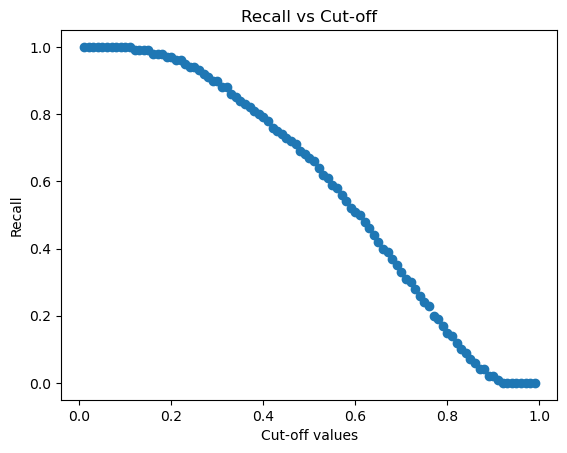

In [206]:
# plt.scatter(list_cut_off, list_recall)
plt.scatter(df_recall.cut_off, df_recall.recall)
plt.xlabel('Cut-off values')
plt.title('Recall vs Cut-off')
plt.ylabel('Recall')

In [207]:
df_recall.loc[28,:]

cut_off    0.29
recall     0.90
Name: 28, dtype: float64

In [208]:
cut_off = 0.29
cut_off

0.29

In [209]:
#               precision    recall  f1-score   support

#            0       0.97      0.50      0.66     56554
#            1       0.13      0.84      0.22      4949

#     accuracy                           0.53     61503
#    macro avg       0.55      0.67      0.44     61503
# weighted avg       0.90      0.53      0.63     61503

In [210]:
#               precision    recall  f1-score   support

#            0       0.97      0.50      0.66     56554
#            1       0.13      0.85      0.22      4949

#     accuracy                           0.53     61503
#    macro avg       0.55      0.68      0.44     61503
# weighted avg       0.91      0.53      0.63     61503

In [211]:
df_check = pd.DataFrame(y_pred_lgb_proba, columns = ['pred_proba'])
df_check['pred cut-off: ' + str(cut_off)] = y_pred_final_lgb
df_check['TARGET'] = y_test
df_check

,pred_proba,pred cut-off: 0.29,TARGET
0,0.602775,1,0
1,0.314247,1,0
2,0.630192,1,0
3,0.178411,0,0
4,0.346057,1,0
...,...,...,...
61498,0.498079,1,0
61499,0.675521,1,0
61500,0.194445,0,0
61501,0.259731,0,0


In [212]:
df_check = pd.concat([df_check, X_test.reset_index()], axis = 1)
df_check

,pred_proba,pred cut-off: 0.29,TARGET,index,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OWN_CAR_AGE
0,0.602775,1,0,245895,0.000527,0.675878,0.604894,52641.0,-13297,465457.5,-2.0,418500.0,-4307,-762,207000.0,19.0
1,0.314247,1,0,98194,0.712155,0.430827,0.425351,48946.5,-14778,1281712.5,-1071.0,1179000.0,-4546,-1141,247500.0,11.0
2,0.630192,1,0,36463,0.207964,0.527239,0.531760,39109.5,-17907,495000.0,-1435.0,495000.0,-1461,-639,202500.0,4.0
3,0.178411,0,0,249923,0.614414,NaN,0.693521,24939.0,-19626,254700.0,-2000.0,225000.0,-3158,-6982,247500.0,NaN
4,0.346057,1,0,158389,0.636376,0.654882,0.560690,15862.5,-20327,308133.0,-173.0,234000.0,-494,-1105,112500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,0.498079,1,0,256564,0.307737,0.581535,0.401592,45000.0,-18622,900000.0,-1638.0,900000.0,-2153,-2097,450000.0,1.0
61499,0.675521,1,0,278889,0.138513,0.390905,0.495743,24030.0,-12325,202500.0,-1862.0,202500.0,-4518,-187,225000.0,NaN
61500,0.194445,0,0,221828,0.742182,NaN,0.591947,30357.0,-23629,254700.0,-1587.0,225000.0,-4260,365243,121500.0,NaN
61501,0.259731,0,0,190245,0.698668,NaN,0.325968,38551.5,-17350,1314117.0,0.0,1147500.0,-854,-4118,112500.0,2.0


In [213]:
# df_check = df_check[['TARGET','pred_proba','pred cut-off: 0.29','EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','AMT_ANNUITY','DAYS_BIRTH',
#                              'AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
#                              'DAYS_EMPLOYED','AMT_INCOME_TOTAL','OWN_CAR_AGE']]
df_check = df_check.dropna()
df_check

,pred_proba,pred cut-off: 0.29,TARGET,index,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,AMT_ANNUITY,DAYS_BIRTH,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OWN_CAR_AGE
0,0.602775,1,0,245895,0.000527,0.675878,0.604894,52641.0,-13297,465457.5,-2.0,418500.0,-4307,-762,207000.0,19.0
1,0.314247,1,0,98194,0.712155,0.430827,0.425351,48946.5,-14778,1281712.5,-1071.0,1179000.0,-4546,-1141,247500.0,11.0
2,0.630192,1,0,36463,0.207964,0.527239,0.531760,39109.5,-17907,495000.0,-1435.0,495000.0,-1461,-639,202500.0,4.0
14,0.497050,1,0,130021,0.221335,0.369833,0.512841,28813.5,-11214,774000.0,-67.0,774000.0,-626,-831,180000.0,15.0
21,0.343229,1,0,42613,0.374021,0.306497,0.708189,38610.0,-9664,755190.0,-1118.0,675000.0,-2332,-817,270000.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61489,0.489929,1,0,291698,0.236611,0.630821,0.689968,17167.5,-17243,314055.0,-2888.0,238500.0,-789,-1225,157500.0,14.0
61495,0.140898,0,0,287881,0.681706,0.383495,0.585174,54877.5,-20643,1575000.0,-2623.0,1575000.0,-4150,-6456,270000.0,10.0
61496,0.492720,1,1,196642,0.447179,0.470361,0.489485,26509.5,-11111,545040.0,-310.0,450000.0,-726,-574,157500.0,3.0
61497,0.462619,1,0,167794,0.410103,0.571886,0.560189,23089.5,-23793,521280.0,-1613.0,450000.0,-5485,365243,171000.0,20.0


## Exemple credit ACCEPTE : 0

In [214]:
df_check[df_check['TARGET'] == 0].loc[0,:]

pred_proba                     0.602775
pred cut-off: 0.29             1.000000
TARGET                         0.000000
index                     245895.000000
EXT_SOURCE_3                   0.000527
EXT_SOURCE_1                   0.675878
EXT_SOURCE_2                   0.604894
AMT_ANNUITY                52641.000000
DAYS_BIRTH                -13297.000000
AMT_CREDIT                465457.500000
DAYS_LAST_PHONE_CHANGE        -2.000000
AMT_GOODS_PRICE           418500.000000
DAYS_ID_PUBLISH            -4307.000000
DAYS_EMPLOYED               -762.000000
AMT_INCOME_TOTAL          207000.000000
OWN_CAR_AGE                   19.000000
Name: 0, dtype: float64

## Exemple credit REFUSE : 1

In [215]:
df_check[df_check['TARGET'] == 1].loc[83,:]

pred_proba                3.461309e-01
pred cut-off: 0.29        1.000000e+00
TARGET                    1.000000e+00
index                     1.439160e+05
EXT_SOURCE_3              7.151031e-01
EXT_SOURCE_1              2.453906e-01
EXT_SOURCE_2              6.009103e-01
AMT_ANNUITY               4.863150e+04
DAYS_BIRTH               -1.097300e+04
AMT_CREDIT                1.223010e+06
DAYS_LAST_PHONE_CHANGE    0.000000e+00
AMT_GOODS_PRICE           1.125000e+06
DAYS_ID_PUBLISH          -2.970000e+03
DAYS_EMPLOYED            -1.940000e+02
AMT_INCOME_TOTAL          2.250000e+05
OWN_CAR_AGE               1.000000e+00
Name: 83, dtype: float64

In [216]:
df_check[df_check['TARGET'] == 1].loc[61063,:]


pred_proba                     0.724483
pred cut-off: 0.29             1.000000
TARGET                         1.000000
index                     112587.000000
EXT_SOURCE_3                   0.130947
EXT_SOURCE_1                   0.048507
EXT_SOURCE_2                   0.472275
AMT_ANNUITY                 6750.000000
DAYS_BIRTH                -14186.000000
AMT_CREDIT                135000.000000
DAYS_LAST_PHONE_CHANGE      -576.000000
AMT_GOODS_PRICE           135000.000000
DAYS_ID_PUBLISH            -5024.000000
DAYS_EMPLOYED              -1614.000000
AMT_INCOME_TOTAL           63000.000000
OWN_CAR_AGE                   14.000000
Name: 61063, dtype: float64

## Sauvegarde prediction modele TEST dataset - Kaggle submission

In [217]:
test_id = test['SK_ID_CURR']
preds = lgbm_model.predict_proba(X_t)[:, 1]
# preds = model.predict(X_t)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id

In [218]:
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("20220221_lgbm_12feats_late_submission_testJM.csv", index=False)
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.320176
1,100005,0.521012
2,100013,0.162472
3,100028,0.221963
4,100038,0.635377


### Importance des features

In [219]:
feature_imp = pd.DataFrame({'Feature importance':lgbm_model.feature_importances_,'Feature':X_all.columns}).sort_values('Feature importance', ascending=False).reset_index(drop=True)
feature_imp

,Feature importance,Feature
0,1950,EXT_SOURCE_3
1,1855,EXT_SOURCE_1
2,1695,EXT_SOURCE_2
3,1676,AMT_ANNUITY
4,1528,DAYS_BIRTH
5,1505,AMT_CREDIT
6,1369,DAYS_LAST_PHONE_CHANGE
7,1288,AMT_GOODS_PRICE
8,1183,DAYS_ID_PUBLISH
9,1154,DAYS_EMPLOYED


In [220]:
feature_imp[:12]

,Feature importance,Feature
0,1950,EXT_SOURCE_3
1,1855,EXT_SOURCE_1
2,1695,EXT_SOURCE_2
3,1676,AMT_ANNUITY
4,1528,DAYS_BIRTH
5,1505,AMT_CREDIT
6,1369,DAYS_LAST_PHONE_CHANGE
7,1288,AMT_GOODS_PRICE
8,1183,DAYS_ID_PUBLISH
9,1154,DAYS_EMPLOYED


In [221]:
list_selected_feats = list(feature_imp['Feature'][:12])
list_selected_feats

['EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_GOODS_PRICE',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'OWN_CAR_AGE']

In [222]:
lgb.plot_importance(lgbm_model, figsize=(12, 25), max_num_features=100);

NameError: name 'lgb' is not defined

In [ ]:
lgbm_model.feature_name_

In [ ]:
df_stats_X_all = X_all.describe().loc[['mean', 'min', '25%', '50%', '75%', 'max'],:].copy(deep=True)
df_stats_X_all = df_stats_X_all.reset_index(drop=True)
# df_stats_X_all.reset_index()
df_stats_X_all

In [ ]:
X_all.describe().loc['50%',:]

In [ ]:
X_all.describe().loc['mean',:]

In [ ]:
X_all.loc[0,:]

In [ ]:
X_all.shape

In [ ]:
df_stats_X_all

In [ ]:
y_pred_lgb_proba_mean = lgbm_model.predict_proba(df_stats_X_all)[:, 1]
y_pred_lgb_proba_mean

In [ ]:
list(X_all.describe().index)

In [ ]:
df_pred = pd.DataFrame(y_pred_lgb_proba_mean, index = list(X_all.describe().loc[['mean', 'min', '25%', '50%', '75%', 'max'],:].index), columns = ['Prediction'])
df_pred

In [ ]:
data_sample = df_stats_X_all.loc[:0,:]
data_sample.values[0]

In [ ]:
data_sample

In [ ]:

input_data_example = dict(zip(list_selected_feats, list(data_sample.values[0])))
input_data_example

In [ ]:
sample_json = input_data_example

In [ ]:
#     EXT_SOURCE_3 = sample_json['EXT_SOURCE_3']
#     EXT_SOURCE_1 = sample_json['EXT_SOURCE_1']
#     EXT_SOURCE_2 = sample_json['EXT_SOURCE_2']
#     AMT_ANNUITY = sample_json['AMT_ANNUITY']
    
#     DAYS_BIRTH = sample_json['DAYS_BIRTH']
#     AMT_CREDIT = sample_json['AMT_CREDIT']
#     DAYS_LAST_PHONE_CHANGE = sample_json['DAYS_LAST_PHONE_CHANGE']
#     AMT_GOODS_PRICE = sample_json['AMT_GOODS_PRICE']
    
#     DAYS_ID_PUBLISH = sample_json['DAYS_ID_PUBLISH']
#     DAYS_EMPLOYED = sample_json['DAYS_EMPLOYED']
#     AMT_INCOME_TOTAL = sample_json['AMT_INCOME_TOTAL']
#     OWN_CAR_AGE = sample_json['OWN_CAR_AGE']
    
#     credit_info = [[EXT_SOURCE_3, EXT_SOURCE_1, EXT_SOURCE_2, AMT_ANNUITY,
#                     DAYS_BIRTH, AMT_CREDIT, DAYS_LAST_PHONE_CHANGE, AMT_GOODS_PRICE,
#                     DAYS_ID_PUBLISH, DAYS_EMPLOYED, AMT_INCOME_TOTAL, OWN_CAR_AGE]]

In [ ]:
return_prediction(lgbm_model,sample_json, 0.29)

In [ ]:
sample_json

In [ ]:
df_check['Good_pred'] = (df_check['TARGET'] == df_check['pred cut-off: 0.29'])
df_check

In [ ]:
df_check_good = df_check[df_check['Good_pred'] == True].copy(deep=True)
df_check_good

# Exemple REJECTED : 1

In [ ]:
['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','AMT_ANNUITY','DAYS_BIRTH',
                    'AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','DAYS_ID_PUBLISH',
                    'DAYS_EMPLOYED','AMT_INCOME_TOTAL','OWN_CAR_AGE']

In [ ]:
df_check_good[df_check_good['TARGET'] == 1]

In [ ]:
df_check_good[df_check_good['TARGET'] == 1].loc[61063,:]

In [ ]:
input_sample_rejected_json = dict(zip(list(df_check_good[df_check_good['TARGET'] == 1].loc[61063,'EXT_SOURCE_3':'OWN_CAR_AGE'].index), 
                                      list(df_check_good[df_check_good['TARGET'] == 1].loc[61063,'EXT_SOURCE_3':'OWN_CAR_AGE'].values)))
input_sample_rejected_json

In [ ]:
return_prediction(lgbm_model,input_sample_rejected_json, 0.29)

# Exemple ACCEPTED : 0

In [ ]:
df_check_good[df_check_good['TARGET'] == 0].loc[33,:]

In [ ]:
input_sample_accepted_json = dict(zip(list(df_check[df_check['TARGET'] == 0].loc[33,'EXT_SOURCE_3':'OWN_CAR_AGE'].index), 
                                      list(df_check[df_check['TARGET'] == 0].loc[33,'EXT_SOURCE_3':'OWN_CAR_AGE'].values)))
input_sample_accepted_json

In [ ]:
return_prediction(lgbm_model,input_sample_accepted_json, 0.29)

## Sauvergarde modele pre-entraine (seulement sur train... mais a reentrainer sur dataset complet)

In [ ]:
# Xy_all = data.loc[:, (data.columns != 'TARGET') & (data.columns != 'SK_ID_CURR') 
#                      & (data.columns != 'SK_ID_PREV')]
# X_all.shape

In [ ]:
X_all

In [ ]:
df_y_all = pd.DataFrame(y_all, columns = ['TARGET'])
df_y_all

In [ ]:
Xy_all = pd.concat([df_y_all, X_all], axis=1)
Xy_all

In [ ]:
Xy_all_no_nan = Xy_all.dropna()
Xy_all_no_nan

In [ ]:
X_all_no_nan = Xy_all_no_nan.loc[:, (Xy_all_no_nan.columns != 'TARGET')]

y_all_no_nan = Xy_all_no_nan.loc[:, (Xy_all_no_nan.columns == 'TARGET')]
y_all_no_nan.shape

X_all_no_nan.shape, y_all_no_nan.shape

In [ ]:
lgbm_model_params = X_t.columns
lgbm_model_params


## Sauvegarde fichier

In [ ]:
with open('model_lgbm_12var.pkl', 'wb') as outp:
#     my_model_save = (model, pred, my_best_params, my_best_score)
    my_model_save = (lgbm_model, list(lgbm_model_params), X_all_no_nan, y_all_no_nan, df_recall)
    pickle.dump(my_model_save, outp, pickle.HIGHEST_PROTOCOL)
my_model_save

### Test d'import du modele

In [ ]:
del my_model_save

In [ ]:
with open('model_lgbm_12var.pkl', 'rb') as inp:
    my_model_load = pickle.load(inp)

In [ ]:
model = my_model_load[0]
model_params = my_model_load[1]
X_all_no_nan = my_model_load[2]
y_all_no_nan = my_model_load[3]
df_recall = my_model_load[4]

In [ ]:
model, model_params


In [ ]:
X_all_no_nan.shape, y_all_no_nan.shape

In [ ]:
df_recall

In [ ]:
list_cut_off_input = list(df_recall.cut_off.values)
list_cut_off_input[:10]

In [ ]:
list_recall_input = list(df_recall.recall.values)
list_recall_input[:10]

In [ ]:
selected_param = model_params[4]
selected_param

In [ ]:
index_param = model_params.index(selected_param)
index_param

In [ ]:
round(0.123456,2)

In [ ]:
list_cut_off_input = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
			0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
			0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
			0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
			0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
			0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
			0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
			0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
			0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
list_recall_input = [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
			0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.97, 0.97, 0.96, 0.96,
			0.95, 0.94, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.9 , 0.88, 0.88, 0.86,
			0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.76, 0.75, 0.74,
			0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.66, 0.64, 0.62, 0.61, 0.59,
			0.58, 0.56, 0.54, 0.52, 0.51, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 ,
			0.39, 0.37, 0.35, 0.33, 0.31, 0.3 , 0.28, 0.26, 0.24, 0.23, 0.2 ,
			0.19, 0.17, 0.15, 0.14, 0.12, 0.1 , 0.09, 0.07, 0.06, 0.04, 0.04,
			0.02, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]

In [ ]:
# list_cut_off_input = [25.75443, 26.7803, 25.79099, 24.17642, 24.3526, 22.79056, 20.84866, 19.49222, 18.38086, 18.0358, 16.57819, 15.71255, 14.79059, 13.64154, 13.09409, 12.18347, 11.33447, 10.32184, 9.544922, 8.813385, 8.181152, 6.983734, 6.048035, 5.505096, 4.65799]
min(range(len(list_cut_off_input)), key=lambda i: abs(list_cut_off_input[i]-0.22))


In [ ]:
myVal = .95

In [ ]:
min(enumerate(list_recall_input), key=lambda x: abs(x[1] - myVal))

In [ ]:
list_cut_off_input[min(range(len(list_recall_input)), key=lambda i: abs(list_recall_input[i] - myVal))]


# Tests d'illustrations possibles pour l'APP

In [ ]:
X_test

In [ ]:
# X_test['y_pred'] = y_pred_lgb
# X_test['y_true'] = y_test

In [ ]:
X_test_clean = X_test.copy(deep=True)

X_test_clean['y_pred'] = y_pred_lgb
X_test_clean['y_true'] = y_test

X_test_clean = X_test_clean.dropna()
X_test_clean

In [ ]:
y_test_graph = X_test_clean['y_true'].copy(deep=True)
y_test_graph

In [ ]:
y_test_pred_graph = X_test_clean['y_pred'].copy(deep=True)
y_test_pred_graph

In [ ]:
X_test_graph = X_test_clean.loc[:, (X_test_clean.columns != 'y_pred') & (X_test_clean.columns != 'y_true')]
X_test_graph

In [ ]:
tsne_plot = manifold.TSNE(n_components=2,
#                      perplexity=100,
#                      learning_rate='auto',
                     perplexity=37,
                     learning_rate=505,
                     n_iter=1000, init='pca') # init='pca' 
X_tsne_plot = tsne_plot.fit_transform(X_test_graph)

In [ ]:
X_tsne_plot.shape

In [ ]:
mockup_y = np.ones(X_tsne_plot.shape[0])
mockup_y

In [ ]:
y_pred_lgb.shape

In [ ]:
fig, asx = plt.subplots(1, 2,figsize=(16,6))
cm = plt.cm.get_cmap('RdYlBu')
fig.suptitle('Comparison Predicted vs True Category - Plotted with TSNE')
asx[0].scatter(X_tsne_plot[:, 0], X_tsne_plot[:, 1], c=y_test_pred_graph,  cmap=cm)
asx[0].set_title("Predicted categories")
asx[1].scatter(X_tsne_plot[:, 0], X_tsne_plot[:, 1], c=y_test_graph,  cmap=cm)
asx[1].set_title("True Categories")
fig.show()

In [ ]:
plt.hist(X_test_graph['EXT_SOURCE_3'])
plt.axvline(x=0.531686, color='magenta', label='Customer')

In [ ]:
plt.scatter(X_test_graph['EXT_SOURCE_3'], y_test_graph)
plt.scatter(0.531686, 1, color='magenta', label='Customer')

In [ ]:
client_cut_off = 0.29
client_recall = ft_cut_off(client_cut_off, y_pred_lgb_proba)

In [ ]:
# plt.scatter(list_cut_off, list_recall)
plt.scatter(df_recall.cut_off, df_recall.recall)
plt.scatter(client_cut_off, client_recall, color = 'magenta')
plt.xlabel('Cut-off values')
plt.ylabel('Recall')

## Test de script poour generation de graphs au sein de l'APP

In [ ]:
import io
import random
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [ ]:
def plot_png():
    fig = create_figure()
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

def create_figure(list_cut_off, list_recall, client_cut_off, client_recall):
    fig = Figure()
    axis = fig.add_subplot(1, 1, 1)
    plt.scatter(list_cut_off, list_recall)
    plt.scatter(client_cut_off, client_recall, color = 'magenta')
    plt.xlabel('Cut-off values')
    plt.ylabel('Recall')
    return fig

In [ ]:
list_recall_input = np.array(list_recall)
list_recall_input
#  = , list_recall

In [ ]:
client_recall = ft_cut_off(client_cut_off, y_pred_lgb_proba)
client_recall

In [ ]:
client_cut_off = 0.29
client_recall = 0.904

list_cut_off_input = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
list_recall_input = [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.97, 0.97, 0.96, 0.96,
       0.95, 0.94, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.9 , 0.88, 0.88, 0.86,
       0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.76, 0.75, 0.74,
       0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.66, 0.64, 0.62, 0.61, 0.59,
       0.58, 0.56, 0.54, 0.52, 0.51, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 ,
       0.39, 0.37, 0.35, 0.33, 0.31, 0.3 , 0.28, 0.26, 0.24, 0.23, 0.2 ,
       0.19, 0.17, 0.15, 0.14, 0.12, 0.1 , 0.09, 0.07, 0.06, 0.04, 0.04,
       0.02, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]

In [ ]:
fig = Figure()
axis = fig.add_subplot(1, 1, 1)
axis.scatter(list_cut_off_input, list_recall_input)
axis.scatter(client_cut_off, client_recall, color = 'magenta')
output = io.BytesIO()
FigureCanvas(fig).print_png(output)

In [ ]:
import io
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

def plot_png(list_cut_off, list_recall, client_cut_off, client_recall):
    fig = Figure()
    axis = fig.add_subplot(1, 1, 1)
    axis.scatter(list_cut_off_input, list_recall_input)
    axis.scatter(client_cut_off, client_recall, color = 'magenta')
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

### Elemnts de script du deployement - draft (App editee separemment sous Sublime text)

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
import joblib
import pickle

with open('model_best_lgb_gs.pkl', 'rb') as inp:
    my_model_load = pickle.load(inp)

model = my_model_load[0]
model_params = my_model_load[1]

def return_prediction(model,sample_json, cut_off):


    EXT_SOURCE_3 = sample_json['EXT_SOURCE_3']
    EXT_SOURCE_1 = sample_json['EXT_SOURCE_1']
    EXT_SOURCE_2 = sample_json['EXT_SOURCE_2']
    AMT_ANNUITY = sample_json['AMT_ANNUITY']
    
    DAYS_BIRTH = sample_json['DAYS_BIRTH']
    AMT_CREDIT = sample_json['AMT_CREDIT']
    DAYS_LAST_PHONE_CHANGE = sample_json['DAYS_LAST_PHONE_CHANGE']
    AMT_GOODS_PRICE = sample_json['AMT_GOODS_PRICE']
    
    DAYS_ID_PUBLISH = sample_json['DAYS_ID_PUBLISH']
    DAYS_EMPLOYED = sample_json['DAYS_EMPLOYED']
    AMT_INCOME_TOTAL = sample_json['AMT_INCOME_TOTAL']
    OWN_CAR_AGE = sample_json['OWN_CAR_AGE']
    
    credit_info = [[EXT_SOURCE_3, EXT_SOURCE_1, EXT_SOURCE_2, AMT_ANNUITY,
                    DAYS_BIRTH, AMT_CREDIT, DAYS_LAST_PHONE_CHANGE, AMT_GOODS_PRICE,
                    DAYS_ID_PUBLISH, DAYS_EMPLOYED, AMT_INCOME_TOTAL, OWN_CAR_AGE]]

    classes = np.array(['approved', 'rejected'])

    y_pred_proba = model.predict_proba(credit_info)[:, 1][0]

    if y_pred_proba > cut_off:
        y_pred = 1
    else:
        y_pred = 0

    return y_pred_proba, y_pred, classes[y_pred]

In [ ]:
model

In [ ]:
model_params

# GridSearchCV - etude de sensibilite du modele
### utilisee pour optimiser les parametres finaux du modele utilise ci-dessus

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train.columns

In [ ]:
X_test.columns

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='roc_auc',
                       do_probabilities = True):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
#         n_jobs=-1, 
        scoring=scoring_fit,
        verbose=100,
#         silent=-1
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)[:, 1]
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
model = lgb.LGBMClassifier(class_weight = mydict)
param_grid = {
#     'n_estimators': [200, 400, 1000, 2000, 4000],
    'n_estimators': [800],
#     'learning_rate' : [0.3, 0.1, 0.03, 0.01],
    'learning_rate' : [0.1],
#     'num_leaves': [20, 30, 40],
    'num_leaves': [20],
#     'colsample_bytree': [0.6, .8, .9, 1],
    'colsample_bytree': [1.],
    'subsample': [0.9],
#     'max_depth': [3, 5, 7, 9, 13],
    'max_depth': [13],
#     'reg_alpha': [1, .1, 0.01],
    'reg_alpha': [.1],
#     'reg_lambda': [1, .1, 0.01],
    'reg_lambda': [.1],
#     'min_split_gain': [0, .01],
    'min_split_gain': [0.01],
#     'min_child_weight': [0.01, 0.1, 1, 2, 3],
    'min_child_weight': [2],
#     'subsample_freq': [20],
#     'verbose': 0,
#     'silent'=-1,
    
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, )

my_best_score = model.best_score_
my_best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)


In [ ]:
pred

In [ ]:
my_best_score = model.best_score_
my_best_params = model.best_params_

In [ ]:
my_best_score

In [ ]:
my_best_params

In [ ]:
y_pred_final_lgb_gs = []
for my_pred in pred:
    if my_pred > 0.29:
        y_pred_final_lgb_gs.append(1)
    else:
        y_pred_final_lgb_gs.append(0)
y_pred_final_lgb[:10]
print(classification_report(y_test, y_pred_final_lgb_gs))

## ----- Fin : Partie 2 : Modele -----